#**NBA Trends**

En este proyecto, analizará datos de la NBA (Asociación Nacional de Baloncesto) y explorará posibles asociaciones.

Estos datos se obtuvieron originalmente del Análisis de la historia completa de la NBA y contienen los datos originales sin modificar de Basketball Reference, así como varias variables adicionales.

Para este proyecto, limitamos los datos a solo 5 equipos y 10 columnas (más una columna construida, `point_diff`, la diferencia entre `pts` y `opp_pts`).



In [3]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True, precision = 2)

nba = pd.read_csv('./nbaallelo-reduced.csv')
nba

,Unnamed: 0,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5
...,...,...,...,...,...,...,...,...,...,...,...,...
24354,24354,201504280LAC,2015,Spurs,Clippers,A,1,111,107,W,0.383515,4
24355,24355,201504290ATL,2015,Nets,Hawks,A,1,97,107,L,0.238122,-10
24356,24356,201504300SAS,2015,Spurs,Clippers,H,1,96,102,L,0.684116,-6
24357,24357,201505010BRK,2015,Nets,Hawks,H,1,87,111,L,0.484831,-24


In [4]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

#Analizando las relaciones entre Cuantitativo y Categórico

1. Los datos se han dividido en dos conjuntos de datos más pequeños: juegos de 2010 (llamados `nba_2010`) y juegos de 2014 (llamados `nba_2014`). Para empezar, centrémonos en los datos de 2010.

  Suponga que desea comparar los knicks con las redes con respecto a los puntos ganados por juego. Usando la columna `pts` del DataFrame `nba_2010`, cree dos series llamadas `knicks_pts` (`fran_id = "Knicks"`) y `nets_pts`(`fran_id = "Nets"`) que representan los puntos que cada equipo ha anotado en sus juegos.

In [7]:
knicks_pts = nba_2010.pts[nba.fran_id == "Knicks"]
nets_pts = nba_2010.pts[nba.fran_id == "Nets"]

2. Calcule la diferencia entre el promedio de puntos anotados por los dos equipos y guarde el resultado como `diff_means_2010`. Según este valor, ¿cree que `fran_id` y `pts` están asociados? ¿Por qué o por qué no?

In [8]:
knicks_mean_score_2010 = np.mean(knicks_pts)
nets_mean_score_2010 = np.mean(nets_pts)

diff_means_2010 = knicks_mean_score_2010 - nets_mean_score_2010

print(diff_means_2010)

9.731707317073173


3. En lugar de comparar medias, es útil observar la distribución completa de valores para comprender si una diferencia en las medias es significativa. Cree un conjunto de histogramas superpuestos que se puedan usar para comparar los puntos anotados por los Knicks en comparación con los Nets. Use la serie que creó en el paso anterior (1) para crear la trama. ¿Las distribuciones parecen ser las mismas?

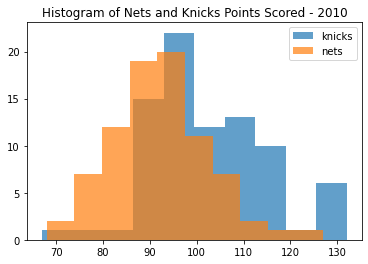

In [9]:
plt.title('Histogram of Nets and Knicks Points Scored - 2010')
plt.hist(knicks_pts,alpha=0.7, label='knicks')
plt.hist(nets_pts,alpha=0.7, label='nets')
plt.legend()
plt.show()

4. Ahora, comparemos los juegos de 2010 con los de 2014. Replique los pasos de los tres ejercicios anteriores usando `nba_2014`. Primero, calcule la diferencia media entre los puntos anotados por los dos equipos. Guarde e imprima el valor como `diff_means_2014`. ¿La diferencia de puntos aumentó o disminuyó en 2014? Luego, traza los histogramas superpuestos. ¿Tiene sentido la diferencia de medias que calculaste?

In [10]:
knicks_pts_2014 = nba_2014.pts[nba.fran_id == "Knicks"]
nets_pts_2014 = nba_2014.pts[nba.fran_id == "Nets"]

In [11]:
knicks_mean_score_2014 = np.mean(knicks_pts_2014)
nets_mean_score_2014 = np.mean(nets_pts_2014)

diff_means_2014 = knicks_mean_score_2014 - nets_mean_score_2014

print(diff_means_2014)

0.44706798131809933


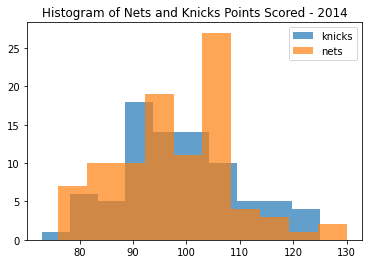

In [12]:
plt.title('Histogram of Nets and Knicks Points Scored - 2014')
plt.hist(knicks_pts_2014,alpha=0.7, label='knicks')
plt.hist(nets_pts_2014,alpha=0.7, label='nets')
plt.legend()
plt.show()

5. Para el resto de este proyecto, nos centraremos en los datos de 2010. Ahora incluyamos todos los equipos en el conjunto de datos e investiguemos la relación entre la franquicia y los puntos anotados por partido.

  Usando `nba_2010`, genere diagramas de caja uno al lado del otro con los puntos anotados (`pts`) en el eje y y el equipo (`fran_id`) en el eje x. ¿Hay alguna superposición entre las cajas? ¿Este cuadro sugiere que `fran_id` y `pts` están asociados? ¿Qué pares de equipos, si los hay, obtienen puntajes promedio diferentes por juego?

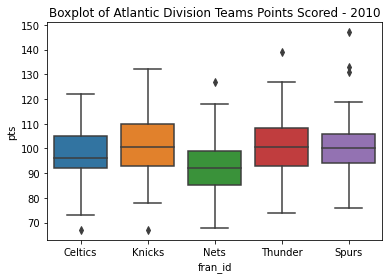

In [14]:
plt.title('Boxplot of Atlantic Division Teams Points Scored - 2010')
sns.boxplot(data=nba_2010, x='fran_id', y='pts')
plt.show()

#Análisis de relaciones entre variables categóricas

6. La variable `game_result` indica si un equipo ganó un juego en particular (`'W'` significa "ganador" y `'L'` significa "derrota"). La variable `game_location` indica si un equipo estaba jugando en casa o fuera (`'H'` significa "local" y `'A'` significa "visita"). ¿Tienden los equipos a ganar más partidos en casa que fuera?

  Los científicos de datos a menudo calcularán una tabla de contingencia de frecuencias para ayudarlos a determinar si las variables categóricas están asociadas. Calcule una tabla de frecuencias que muestre los recuentos de `game_result` y `game_location`.

  Guarde su resultado como `location_result_freq` e imprima su resultado. Con base en esta tabla, ¿crees que las variables están asociadas?

In [15]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


7. Convierta esta tabla de frecuencias en una tabla de proporciones y guarde el resultado como `location_result_proportions`. Imprime tu resultado.

In [16]:
location_result_proportions = location_result_freq/len(nba_2010)
location_result_proportions

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


8. Utilizando la tabla de contingencia creada en el ejercicio anterior (Ej. 7), calcule la tabla de contingencia esperada (si no hubiera asociación) y el estadístico Chi-Cuadrado e imprima sus resultados. ¿La tabla de contingencia real se parece a la tabla esperada o es diferente? Con base en este resultado, ¿cree que existe una asociación entre estas variables?

In [17]:
chi2, pval, dof, expected = chi2_contingency(location_result_proportions)

expected

array([[0.26, 0.26],
       [0.24, 0.24]])

In [18]:
chi2

3.5294910416996985

#Análisis de relaciones entre variables cuantitativas

9. Para cada juego, se ha calculado la probabilidad de que cada equipo gane el juego. En los datos, esto se guarda como `forecast`. La columna `point_diff` da el margen de victoria/derrota de cada equipo (los valores positivos significan que el equipo ganó; los valores negativos significan que perdieron). ¿Los equipos con mayor probabilidad de ganar también tendían a ganar partidos por más puntos?

  Usando `nba_2010`, calcule la covarianza entre el `forecast` (probabilidad de victoria proyectada) y `point_diff` (el margen de victoria/derrota) en el conjunto de datos. Guarde e imprima su resultado. Mirando la matriz, ¿cuál es la covarianza entre estas dos variables?

In [19]:
point_diff_forecast_cov = np.cov(nba.point_diff, nba.forecast)
point_diff_forecast_cov

array([[177.98,   1.32],
       [  1.32,   0.05]])

10. Usando `nba_2010`, calcule la correlación entre el `forecast` y `point_diff`. Guarde e imprima su resultado. ¿Este valor sugiere una asociación entre las dos variables?

In [21]:
point_diff_forecast_corr = pearsonr(nba.point_diff, nba.forecast)

print(point_diff_forecast_corr)

(0.4644799841112691, 0.0)


11. Genere un diagrama de dispersión de `forecast` (en el eje x) y `point_diff` (en el eje y). ¿Tiene sentido el valor de correlación?

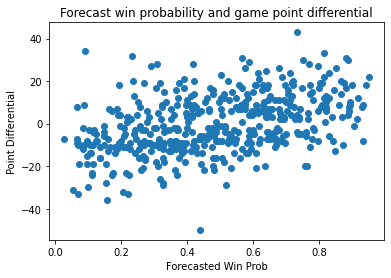

In [22]:
plt.title('Forecast win probability and game point differential')
plt.scatter('forecast', 'point_diff', data = nba_2010)
plt.xlabel('Forecasted Win Prob')
plt.ylabel('Point Differential')
plt.show()